## NetworkX and SpaceSyntax

#### Needed libraries

In [1]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
from IPython.display import Image
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point, LineString

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


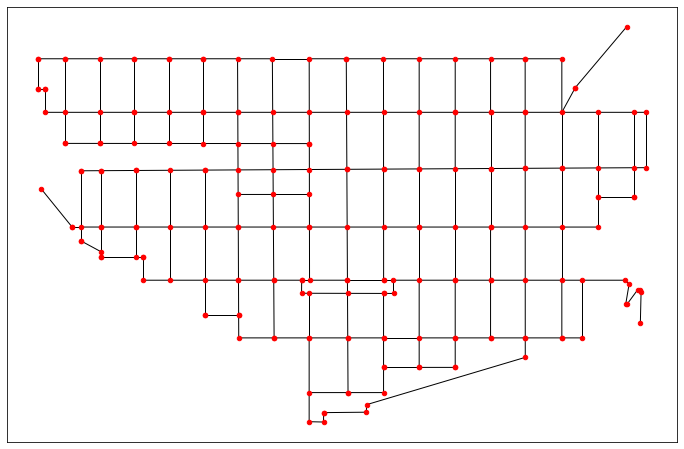

In [2]:
## This function reads shapefile, creates empty graph

G = nx.read_shp(r'./Data/Priene_dotestow/Priene_dotestow_wgs.shp') 

''' Function nx.read_shp
Generates a networkx.DiGraph from shapefiles. 
Point geometries are translated into nodes, lines into edges. 
Coordinate tuples are used as keys. 
Attributes are preserved, line geometries are simplified into start and end coordinates. 
Accepts a single shapefile or directory of many shapefiles.

@Input : path : file or string 
    File, directory, or filename to read.
@Output : G : NetworkX graph
'''

ng = G.nodes
ng = [(-n[0], n[1]) for n in ng]


pos = {k: v for k,v in enumerate(G.nodes())} ## This function creates directory of coordinates of nodes in graph,
                                             ## where:
                                             ##  key - ID (numeration) ; value - coordinate tuples
                                             ## A dictionary with nodes as keys and positions as values

X = nx.Graph() ## This function creates an empty graph
X.add_nodes_from(pos.keys()) ## Add nodes preserving coordinates
l = [set(x) for x in G.edges()]
edg = [tuple(k for k,v in pos.items() if v in sl) for sl in l] ## Map the G.edges start and endpoints onto pos

## Draw graph
plt.figure(figsize=(12,8))
nx.draw_networkx_nodes(X,pos,node_size=20,node_color='r')
X.add_edges_from(edg)
nx.draw_networkx_edges(X,pos)

## Graph convertor - ShapefileToNetwork

##### This function read the shapefile of the road network and convert it into graph by iterating through the lat, lon from the shapefile

In [3]:
from ShapefileToNetwork.main.convertor import GraphConvertor

input_file  =  './Data/Priene_dotestow/Priene_dotestow_wgs.shp'
output_dir  =  './Data/Priene_dotestow/out_wgs'
sysUTM = 'EPSG:32635'

graph_convertor_obj = GraphConvertor.GraphConvertor(input_file, output_dir, sysUTM)
network = graph_convertor_obj.graph_convertor()
positions = graph_convertor_obj.positions

to jest G.edges 230


## Calculating Edge Betweenness Centrality

#### This function calculates parameter Edge Betweenness Centrality from networkX library

In [4]:
def DrawGraph(path, path2, path3):
    Gr = nx.read_shp(path)
    pos = {k: v for k,v in enumerate(Gr.nodes())}
    X = nx.Graph()
    X.add_nodes_from(pos.keys())
    Ge = nx.read_shp(path2)
    l=[x for x in Ge.edges()]
    edg=[tuple(k for k,v in pos.items() if v in sl) for sl in l]

    oidlista = []
    for n in Ge.edges():
        t = list(n)
        oid = Ge.edges[t]['weight']
        if oid != 0:
            oidlista.append(oid)
    
    ed_cen = nx.edge_betweenness_centrality(Ge, weight = 'weight') 
    copiedd = dict.fromkeys(ed_cen.keys())
    dictcopiedd = dict(zip(copiedd, oidlista))
    nx.set_edge_attributes(Ge, dictcopiedd, "weight")
    
    so_ed_cen = nx.edge_betweenness_centrality(Ge, weight = 'weight')
    so_ed_cen_2 = nx.edge_betweenness_centrality(Ge)
    nx.set_edge_attributes(Ge, so_ed_cen, "bet_w")
    nx.set_edge_attributes(Ge, so_ed_cen_2, "bet")
    
    so_df = nx.to_pandas_edgelist(Ge)
    source = list(so_df["source"])
    target = list(so_df["target"])
    ed_cen_sub = nx.edge_betweenness_centrality_subset(Ge, sources = source, targets = target, normalized=True)
    ed_cen_sub_2 = nx.edge_betweenness_centrality_subset(Ge, sources = source, targets = target, normalized=True, weight = "weight")
    nx.set_edge_attributes(Ge, ed_cen_sub, "bet_cen")
    nx.set_edge_attributes(Ge, ed_cen_sub_2, "bet_cen_w")
    so_df = nx.to_pandas_edgelist(Ge)
    so_df.to_csv(r'./Data/Priene_dotestow/out_wgs/New Shape/PrieneEBC/dataframe_Priene.csv')
        
    crs = {'init':'epsg:4326'}
    
    listLines = []
    for i in range(len(so_df)):
        listLines.append(f' LINESTRING ({so_df["source"][i][0]} {so_df["source"][i][1]}, {so_df["target"][i][0]} {so_df["target"][i][1]})')
    so_df['geom'] = listLines
    
    gs = gpd.GeoSeries.from_wkt(so_df['geom'])
    gdf = gpd.GeoDataFrame(so_df, crs=crs, geometry=gs)
    gdf = gdf.drop(columns=['source', 'target','geom','Wkt', 'Wkb', 'Json', 'ShpName'])
    gdf.to_file(path3, driver="ESRI Shapefile")
    
    
path_dest = (r'./Data/Priene_dotestow/out_wgs/New Shape/nodes.shp')
path_dest2 = (r'./Data/Priene_dotestow/out_wgs/New Shape/edges.shp')
path_dest3 = (r'./Data/Priene_dotestow/out_wgs/New Shape/PrieneEBC/output_priene.shp')
DrawGraph(path_dest, path_dest2, path_dest3)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
